# Setting

In [1]:
%matplotlib inline

import os
import numpy as np
from bionlp.util import io, func, plot

DATA_PATH = '../../data'
plot.MON = True

In [2]:
stat_coarse_df = 'stat_coarse.npz'
stat_coarse = io.read_npz(os.path.join(DATA_PATH, stat_coarse_df))['data']

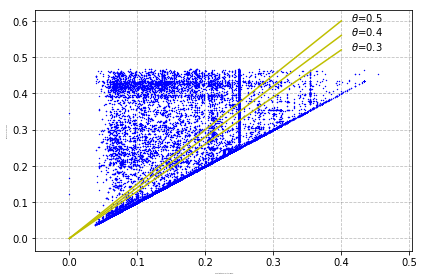

In [3]:
# reload(plot)
# plot.MON=True
plot_cfg = {'refl_kwargs':{'ccolors':'y', 'cwidths':1.5}}
def gen_reflines(theta, xlim=None, nump=100):
    xlim = (0, 0.5) if (xlim is None or len(xlim) != 2) else xlim
    x = np.linspace(xlim[0], xlim[1], nump)
    y = (1 + theta) * x
    return dict(x=x, y=y)
thetas = [0.5, 0.4, 0.3]
reflines = [gen_reflines(theta, (0,0.4)) for theta in thetas]
annotation = dict([((rfl['x'][-1], rfl['y'][-1]), r'$\theta$=%.1f'%theta) for theta, rfl in zip(thetas, reflines)])
annn_props = {'fontsize':10, 'xytext':(10,0), 'arrow':None}
plot.plot_scat(stat_coarse, 'closest distance from other nodes'.title(), 'distance from other nodes'.title(), fmt='pdf', title='', s=8, c='b', marker='.', linewidths=0, ref_lines={'c':reflines}, annotation=annotation, annn_props=annn_props, plot_cfg=plot_cfg)

In [4]:
stat_cond_df = 'stat_cond.npz'
stat_cond = io.read_npz(os.path.join(DATA_PATH, stat_cond_df))['data']

/home/shankai/.conda/envs/skyan/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


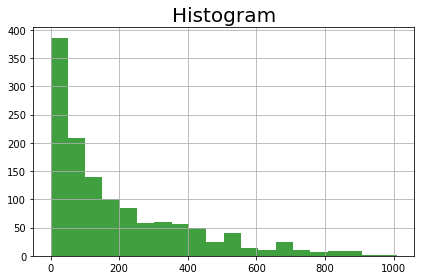

In [5]:
# reload(plot)
# plot.MON=True
plot.plot_hist(stat_cond, '', '', scale=(None, None))

In [6]:
clusters_fname = 'kallima_clusters_2.pkl'
clusters = io.read_obj(os.path.join(DATA_PATH, clusters_fname))
stat_cond_data = []
for clt, cond in clusters.iteritems():
    stat_cond_data.append((len(clt), cond))

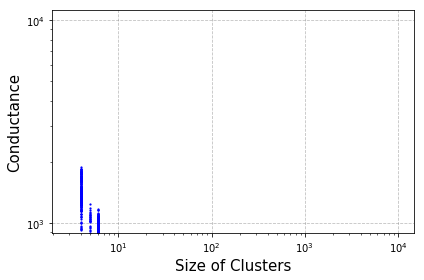

In [7]:
# reload(plot)
# plot.MON=True
plot_cfg = {'xlabel_fontsize':15, 'ylabel_fontsize':15}
plot.plot_scat(np.array(stat_cond_data), 'Size of Clusters', 'Conductance', scale=('log', 'log'), fmt='pdf', title='', s=20, c='b', marker='.', linewidths=0, plot_cfg=plot_cfg)